In [27]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import matplotlib.pyplot as plt


Kinematic Equations:

In [3]:
def display_vector(output, start = (0,0)):
    # Define the components of the vector
    x_component = output[0]
    y_component = output[1]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the vector
    ax.quiver(start[0], start[1], x_component, y_component, angles='xy', scale_units='xy', scale=1, color='b')

    # Set the limits of the plot
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Add labels for the axes
    plt.xlabel('X')
    plt.ylabel('Y')

    # Show the plot
    plt.grid()
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [13]:
def wheel_velocities_to_bot_speed(speeds): 
    speed_x = 0.5 * speeds[0] + 0.5 * speeds[1] + speeds[2]
    speed_y = math.sqrt(3)/2 * speeds[0] -  math.sqrt(3)/2 * speeds[1]
    return np.array([speed_x, speed_y])


0.9150635094610964 -3.4150635094610964 2.5
[1.25 3.75]


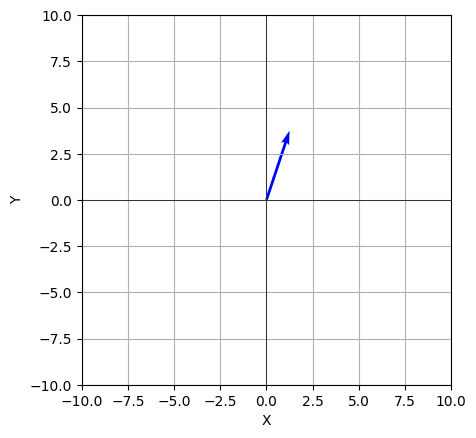

In [14]:
#%%timeit
#this one is from https://www.scirp.org/journal/paperinformation.aspx?paperid=102349

x_speed = 2.5
y_speed = 2.5
angular_velocity = 0
radius_to_wheel = 0.5
desired_speed = la.norm([x_speed, y_speed])

wheel1 = -1/2 * x_speed + math.sqrt(3)/2 * y_speed + radius_to_wheel * angular_velocity
wheel2 = -1/2 * x_speed - math.sqrt(3)/2 * y_speed + radius_to_wheel * angular_velocity
wheel3 = x_speed + radius_to_wheel * angular_velocity
print(wheel1, wheel2, wheel3)

output = wheel_velocities_to_bot_speed([wheel1, wheel2, wheel3])

print (output)
display_vector(output)


[-1.05662433 -3.94337567  5.        ]


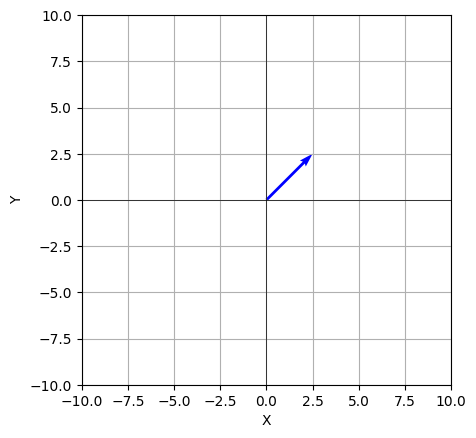

In [15]:
#%%timeit
#This one is my own calculations

#draft
R = 0.10 #radius of bot center to wheel in meters
x_speed = 2.5
y_speed = 2.5
angular_velocity = 0

#desired_speed = la.norm([x_speed, y_speed])
#print("speed =", desired_speed)

conversion_matrix = np.array([[0.5, 0.5, 1],
                              [math.sqrt(3)/2, -math.sqrt(3)/2, 0],
                              [1/R, 1/R, 1/R]])
b = np.array([x_speed, y_speed, angular_velocity])

x = la.solve(conversion_matrix, b)
output = wheel_velocities_to_bot_speed(x)

print (x)
display_vector(output)


[ 0.91506351 -3.41506351  2.5       ]


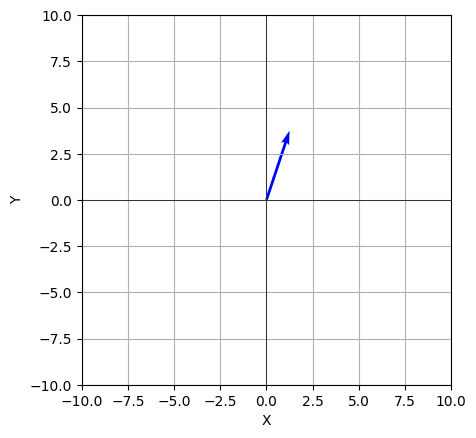

In [16]:
#%%timeit
#this one is from: https://modernrobotics.northwestern.edu/nu-gm-book-resource/13-2-omnidirectional-wheeled-mobile-robots-part-1-of-2/#department

#draft
R = 0.10 #radius of bot center to wheel in meters
x_speed = 2.5
y_speed = 2.5
angular_velocity = 0


desired_speed = la.norm([x_speed, y_speed])
#print("speed =", desired_speed)


conversion_matrix = np.array([[-R, -0.5, math.sqrt(3)/2],
                              [-R, -0.5, -math.sqrt(3)/2],
                              [-R, 1, 0]])

parameters = np.array([angular_velocity, x_speed, y_speed])

x = np.dot(conversion_matrix, parameters)

output = wheel_velocities_to_bot_speed(x) #idk why needed here :(

print (x)
display_vector(output)



Robot Simulation:


In [242]:
ROBOT_RADIUS = 0.01

In [20]:
#Second method
#%%timeit
#This one is my own calculations


def get_wheel_speed(x_direction, y_direction, velocity):
    x_speed = x_direction * velocity
    y_speed = y_direction * velocity
    angular_velocity = 0

    conversion_matrix = np.array([[0.5, 0.5, 1],
                                [math.sqrt(3)/2, -math.sqrt(3)/2, 0],
                                [1/R, 1/R, 1/R]])
    b = np.array([x_speed, y_speed, angular_velocity])

    x = la.solve(conversion_matrix, b)

    return x



In [21]:
def calculate_direction(current_position, goal_position):
    x_direction = goal_position[0] - current_position[0]
    y_direction = goal_position[1] - current_position[1]
    return (x_direction, y_direction)


In [58]:
def display_simulation(vectors):
    fig, ax = plt.subplots()
    # Plot each vector in the list
    for vector in vectors:
        ax.quiver(vector[0], vector[1], vector[2], vector[3], angles='xy', scale_units='xy', scale=1, color='b')

    # Set the limits of the plot
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)

    # Add labels for the axes
    plt.xlabel('X')
    plt.ylabel('Y')

    # Show the plot
    plt.grid()
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

final_position:  [14.94 -9.96]


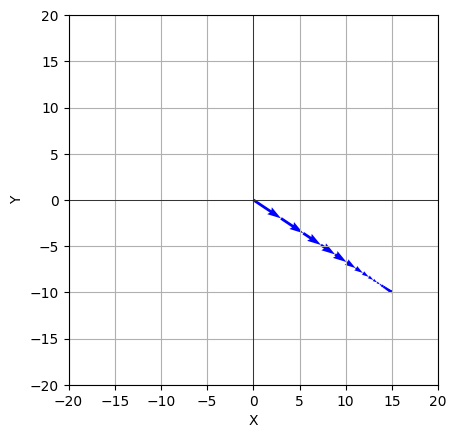

In [75]:
steps = 20
start = (0,0)
end = (15,-10)
velocity = 0.2
distance = la.norm(calculate_direction(start, end))
confidence = 0.1

current_position = np.array(start)

# Initialize an empty list to store vectors
vectors = []

while (abs(distance) >= confidence):
    goal_vector = calculate_direction(current_position, end)
    distance = la.norm(goal_vector)
    wheelspeeds = get_wheel_speed(goal_vector[0], goal_vector[1], velocity)
    
    botmovement_vector = wheel_velocities_to_bot_speed(wheelspeeds)

    vectors.append([current_position[0], current_position[1], botmovement_vector[0], botmovement_vector[1]])
    current_position = current_position + botmovement_vector 



print("final_position: ", np.round(current_position,2))
display_simulation(vectors)
